## 1. Import

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score

## 2. Load Data

In [16]:
#데이터 읽어오기
sun_data = pd.read_csv("train.csv")
sun_data.drop(['Day', 'Hour','Minute'], axis='columns', inplace=True)
X = np.array(sun_data.loc[:, ["DHI", "DNI", "WS", "RH", "T"]].values)
y = np.array(sun_data.loc[:, ["TARGET"]].values)

## 3. Data Preprocessing

In [17]:
#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 4. Model

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

GBR_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=3)
RFR_model = RandomForestRegressor(n_estimators=500, max_features=0.25)
SVR_model = SVR(kernel = 'rbf')
ETR_model = ExtraTreesRegressor(n_estimators=1000)
LR_model = LinearRegression()

models = [GBR_model, RFR_model, SVR_model, ETR_model, LR_model]

def run_model(model_list):

    for model in model_list:
        model.fit(X_train, y_train)
        print(str(model).split('(')[0] + '_score :', model.score(X_test, y_test))

run_model(models)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor_score : 0.997577884363049


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor_score : 0.9862725306603167


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR_score : 0.989890117690397


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ExtraTreesRegressor_score : 0.998518207324815
LinearRegression_score : 0.9007552012488967


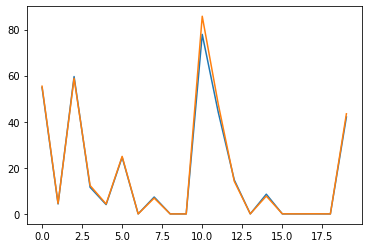

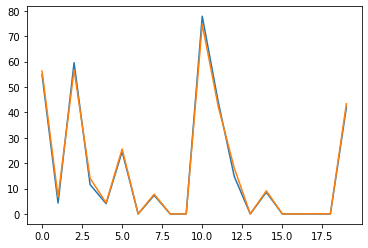

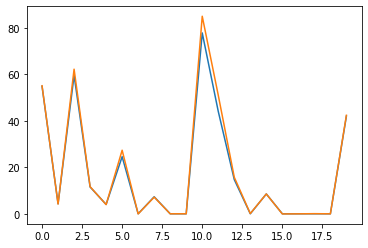

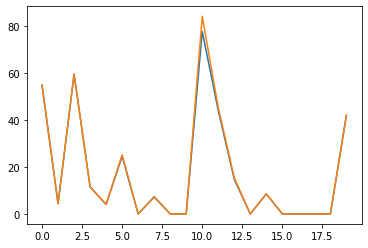

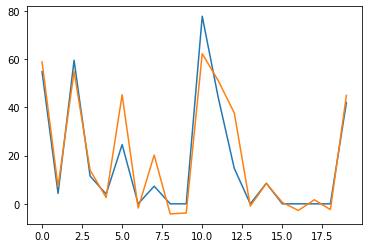

In [47]:
def show_predict(model_list, X, y):
    for model in model_list:
        y_predict = model.predict(X)
        plt.plot(range(20), y[20:40])
        plt.plot(range(20), y_predict[20:40])
        plt.show()
show_predict(models, X_test, y_test)

## 5. GridSearchCV
- 이거 시간 너무 오래 걸려서 못돌려봄..

In [10]:
#그리드 탐색
from sklearn.ensemble import GradientBoostingRegressor

GBR_model = GradientBoostingRegressor()
param_grid={"n_estimators": range(100, 1000, 100),
            "max_depth": [2, 3, 4],
            # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
            # "learning_rate": [0.0001, 0.001, 0.01, 0.1],
            # "max_features": ["auto", "sqrt", "log2"]
           }


grid_GBR = GridSearchCV(estimator=GBR_model, param_grid=param_grid, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print('final params', grid_GBR.best_params_)
print('best score', grid_GBR.best_score_)

KeyboardInterrupt: ignored

In [ ]:
# 그리드 탐색
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor()
param_grid = {'max_depth': range(3,7),
              'n_estimators': range(100, 1000, 100)         
        }
RFR_grid = GridSearchCV(estimator = RFR_model, param_grid=param_grid, cv=10 n_jobs=-1)
RFR_grid.fit(X_train, y_train)

print('final params', grid_GBR.best_params_)
print('best score', grid_GBR.best_score_)